In [2]:
from pandas import *
import matplotlib as mpl
mpl.rc('figure', figsize=(12, 6))
#set_printoptions(max_columns=18)
months = {'JAN' : 1, 'FEB' : 2, 'MAR' : 3, 'APR' : 4, 'MAY' : 5, 'JUN' : 6,
          'JUL' : 7, 'AUG' : 8, 'SEP' : 9, 'OCT': 10, 'NOV': 11, 'DEC' : 12}
of_interest = ['Obama, Barack', 'Romney, Mitt', 'Santorum, Rick', 
               'Paul, Ron', 'Gingrich, Newt']
parties = {
  'Bachmann, Michelle': 'Republican',
  'Romney, Mitt': 'Republican',
  'Obama, Barack': 'Democrat',
  "Roemer, Charles E. 'Buddy' III": 'Reform',
  'Pawlenty, Timothy': 'Republican',
  'Johnson, Gary Earl': 'Libertarian',
  'Paul, Ron': 'Republican',
  'Santorum, Rick': 'Republican',
  'Cain, Herman': 'Republican',
  'Gingrich, Newt': 'Republican',
  'McCotter, Thaddeus G': 'Republican',
  'Huntsman, Jon': 'Republican',
  'Perry, Rick': 'Republican'           
}
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fec = read_csv('P00000001-ALL.txt')

/home/sunil/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1159: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [4]:
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.660103e+08,RETIRED,RETIRED,250,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.660103e+08,RETIRED,RETIRED,50,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.686334e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.245483e+08,NONE,RETIRED,250,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.190165e+08,NONE,RETIRED,300,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [5]:
fec.cand_nm.head()

0    Bachmann, Michelle
1    Bachmann, Michelle
2    Bachmann, Michelle
3    Bachmann, Michelle
4    Bachmann, Michelle
Name: cand_nm, dtype: object

In [7]:
fec['party']=fec.cand_nm.map(parties)

In [8]:
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.660103e+08,RETIRED,RETIRED,250,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.660103e+08,RETIRED,RETIRED,50,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.686334e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.245483e+08,NONE,RETIRED,250,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.190165e+08,NONE,RETIRED,300,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [10]:
fec.ix[0]

cmte_id                       C00410118
cand_id                       P20002978
cand_nm              Bachmann, Michelle
contbr_nm               HARVEY, WILLIAM
contbr_city                      MOBILE
contbr_st                            AL
contbr_zip                 3.660103e+08
contbr_employer                 RETIRED
contbr_occupation               RETIRED
contb_receipt_amt                   250
contb_receipt_dt              20-JUN-11
receipt_desc                        NaN
memo_cd                             NaN
memo_text                           NaN
form_tp                           SA17A
file_num                         736166
party                        Republican
Name: 0, dtype: object

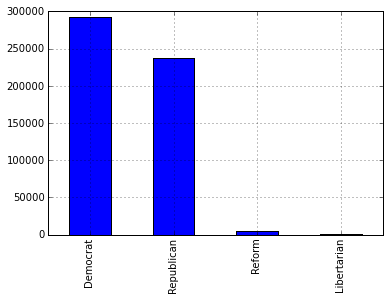

In [15]:
fec.party.value_counts().plot(kind='bar')

In [18]:
#get the graph of donations over time for each party
fec.groupby(['party','contb_receipt_dt'])['contb_receipt_amt'].sum()


party     contb_receipt_dt
Democrat  01-AUG-11           175281.00
          01-DEC-11           651532.82
          01-JAN-12            58098.80
          01-JUL-11           165961.00
          01-JUN-11           145459.00
          01-MAY-11            82644.00
          01-NOV-11           122529.87
          01-OCT-11           148977.00
          01-SEP-11           403297.62
          02-AUG-11           164510.11
          02-DEC-11           216056.96
          02-JAN-12            89743.60
          02-JUL-11            17105.00
          02-JUN-11           422453.00
          02-MAY-11           396675.00
...
Republican  30-JUL-11             12249.04
            30-JUN-11           2744932.63
            30-MAR-11             50240.00
            30-MAY-11             17803.60
            30-NOV-11            809014.83
            30-OCT-11             43913.16
            30-SEP-11           4886331.76
            31-AUG-11           1017735.02
            31-DEC-11    

In [32]:
import datetime
def getdate(inpString,monthDict=months):
    '''takes in the inpString and converts to python date'''
    inpList=inpString.split('-')
    inpList[1]=monthDict[inpList[1]]
    return datetime.date(2000+int(inpList[2]),int(inpList[1]),int(inpList[0]))
getdate('20-JUN-11')


datetime.date(2011, 6, 20)

In [33]:
fec['pdate']=fec['contb_receipt_dt'].map(getdate)

In [34]:
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party,pdate
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.660103e+08,RETIRED,RETIRED,250,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican,2011-06-20
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.660103e+08,RETIRED,RETIRED,50,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican,2011-06-23
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.686334e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican,2011-07-05
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.245483e+08,NONE,RETIRED,250,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican,2011-08-01
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.190165e+08,NONE,RETIRED,300,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican,2011-06-20


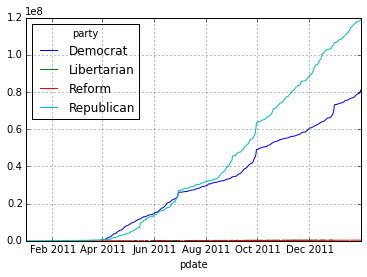

In [38]:
fec.groupby(['party','pdate'])['contb_receipt_amt'].sum().unstack('party').cumsum().plot()

In [39]:
by_date=fec.groupby(['party','pdate'])['contb_receipt_amt'].sum()

In [40]:
by_date.head()

party     pdate     
Democrat  2011-04-04    640235.12
          2011-04-05    307641.00
          2011-04-06    247542.59
          2011-04-07    252336.00
          2011-04-08    295452.00
Name: contb_receipt_amt, dtype: float64

In [55]:
df=by_date.unstack('party').cumsum().tail()[['Democrat','Reform','Republican']]

In [56]:
df

party,Democrat,Reform,Republican
pdate,,,
2012-01-27,78874576.93,338378.78,1.179424e+08
2012-01-28,79110069.78,338553.78,1.180252e+08
2012-01-29,79203246.78,338753.78,1.181004e+08
2012-01-30,79639168.50,338883.78,1.183556e+08
2012-01-31,81057578.81,339033.78,1.192255e+08


In [60]:
c=concat([df,df],axis=1,keys=['A','B'])

In [61]:
c

A                                     B             \
party          Democrat     Reform    Republican     Democrat     Reform   
pdate                                                                      
2012-01-27  78874576.93  338378.78  1.179424e+08  78874576.93  338378.78   
2012-01-28  79110069.78  338553.78  1.180252e+08  79110069.78  338553.78   
2012-01-29  79203246.78  338753.78  1.181004e+08  79203246.78  338753.78   
2012-01-30  79639168.50  338883.78  1.183556e+08  79639168.50  338883.78   
2012-01-31  81057578.81  339033.78  1.192255e+08  81057578.81  339033.78   

                          
party         Republican  
pdate                     
2012-01-27  1.179424e+08  
2012-01-28  1.180252e+08  
2012-01-29  1.181004e+08  
2012-01-30  1.183556e+08  
2012-01-31  1.192255e+08

In [62]:
c['B']

party,Democrat,Reform,Republican
pdate,,,
2012-01-27,78874576.93,338378.78,1.179424e+08
2012-01-28,79110069.78,338553.78,1.180252e+08
2012-01-29,79203246.78,338753.78,1.181004e+08
2012-01-30,79639168.50,338883.78,1.183556e+08
2012-01-31,81057578.81,339033.78,1.192255e+08


In [63]:
c.stack('party')

A             B
pdate      party                                 
2012-01-27 Democrat    7.887458e+07  7.887458e+07
           Reform      3.383788e+05  3.383788e+05
           Republican  1.179424e+08  1.179424e+08
2012-01-28 Democrat    7.911007e+07  7.911007e+07
           Reform      3.385538e+05  3.385538e+05
           Republican  1.180252e+08  1.180252e+08
2012-01-29 Democrat    7.920325e+07  7.920325e+07
           Reform      3.387538e+05  3.387538e+05
           Republican  1.181004e+08  1.181004e+08
2012-01-30 Democrat    7.963917e+07  7.963917e+07
           Reform      3.388838e+05  3.388838e+05
           Republican  1.183556e+08  1.183556e+08
2012-01-31 Democrat    8.105758e+07  8.105758e+07
           Reform      3.390338e+05  3.390338e+05
           Republican  1.192255e+08  1.192255e+08

In [65]:
c.stack(0)

party            Democrat     Reform    Republican
pdate                                             
2012-01-27 A  78874576.93  338378.78  1.179424e+08
           B  78874576.93  338378.78  1.179424e+08
2012-01-28 A  79110069.78  338553.78  1.180252e+08
           B  79110069.78  338553.78  1.180252e+08
2012-01-29 A  79203246.78  338753.78  1.181004e+08
           B  79203246.78  338753.78  1.181004e+08
2012-01-30 A  79639168.50  338883.78  1.183556e+08
           B  79639168.50  338883.78  1.183556e+08
2012-01-31 A  81057578.81  339033.78  1.192255e+08
           B  81057578.81  339033.78  1.192255e+08

In [68]:
c2=concat([df,df],axis=0,keys=['A','B'])

In [69]:
c2

party            Democrat     Reform    Republican
  pdate                                           
A 2012-01-27  78874576.93  338378.78  1.179424e+08
  2012-01-28  79110069.78  338553.78  1.180252e+08
  2012-01-29  79203246.78  338753.78  1.181004e+08
  2012-01-30  79639168.50  338883.78  1.183556e+08
  2012-01-31  81057578.81  339033.78  1.192255e+08
B 2012-01-27  78874576.93  338378.78  1.179424e+08
  2012-01-28  79110069.78  338553.78  1.180252e+08
  2012-01-29  79203246.78  338753.78  1.181004e+08
  2012-01-30  79639168.50  338883.78  1.183556e+08
  2012-01-31  81057578.81  339033.78  1.192255e+08

In [70]:
c2.unstack('pdate')

party     Democrat                                                     \
pdate   2012-01-27   2012-01-28   2012-01-29  2012-01-30   2012-01-31   
A      78874576.93  79110069.78  79203246.78  79639168.5  81057578.81   
B      78874576.93  79110069.78  79203246.78  79639168.5  81057578.81   

party     Reform                                                Republican  \
pdate 2012-01-27 2012-01-28 2012-01-29 2012-01-30 2012-01-31    2012-01-27   
A      338378.78  338553.78  338753.78  338883.78  339033.78  1.179424e+08   
B      338378.78  338553.78  338753.78  338883.78  339033.78  1.179424e+08   

party                                                        
pdate    2012-01-28   2012-01-29   2012-01-30    2012-01-31  
A      1.180252e+08  118100388.9  118355593.7  1.192255e+08  
B      1.180252e+08  118100388.9  118355593.7  1.192255e+08

In [72]:
c2.unstack(0)

party          Democrat                  Reform               Republican  \
                      A            B          A          B             A   
pdate                                                                      
2012-01-27  78874576.93  78874576.93  338378.78  338378.78  1.179424e+08   
2012-01-28  79110069.78  79110069.78  338553.78  338553.78  1.180252e+08   
2012-01-29  79203246.78  79203246.78  338753.78  338753.78  1.181004e+08   
2012-01-30  79639168.50  79639168.50  338883.78  338883.78  1.183556e+08   
2012-01-31  81057578.81  81057578.81  339033.78  339033.78  1.192255e+08   

party                     
                       B  
pdate                     
2012-01-27  1.179424e+08  
2012-01-28  1.180252e+08  
2012-01-29  1.181004e+08  
2012-01-30  1.183556e+08  
2012-01-31  1.192255e+08

In [73]:
#what occupations have donated to what party and candidate
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party,pdate
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.660103e+08,RETIRED,RETIRED,250,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican,2011-06-20
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.660103e+08,RETIRED,RETIRED,50,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican,2011-06-23
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.686334e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican,2011-07-05
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.245483e+08,NONE,RETIRED,250,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican,2011-08-01
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.190165e+08,NONE,RETIRED,300,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican,2011-06-20


In [78]:
fec.groupby(['cand_nm','contbr_occupation'])['contb_receipt_amt'].sum()

cand_nm             contbr_occupation             
Bachmann, Michelle  100% DISABLED VETERAN              1869.50
                    100% DISABLED VIETNAM VETERAN       236.25
                    A/C AND HEAT                        250.00
                    ACADEMIC EMPLOYMENT SPECIALIST       25.00
                    ACCOUNT                              50.00
                    ACCOUNT ANALYST                     200.00
                    ACCOUNT EXECUTIVE                   100.00
                    ACCOUNT MANAGER                     230.00
                    ACCOUNTANT                        12979.00
                    ACCOUNTANT TRAINER                  250.00
                    ACCOUNTING                          350.00
                    ACCOUNTING MANAGER                   50.00
                    ACCOUNTING SPECIALIST               250.00
                    ACCOUNTING SUPERVISOR               125.00
                    ACCOUNTING/AUDITING                 700.00
...


In [80]:
result=fec.groupby(['cand_nm','contbr_occupation']).sum()

In [81]:
result.head()

contb_receipt_amt  file_num
cand_nm            contbr_occupation                                          
Bachmann, Michelle 100% DISABLED VETERAN                     1869.50   6807894
                   100% DISABLED VIETNAM VETERAN              236.25   2260398
                   A/C AND HEAT                               250.00    749016
                   ACADEMIC EMPLOYMENT SPECIALIST              25.00    762366
                   ACCOUNT                                     50.00    762366

In [83]:
result.reset_index().head()

,cand_nm,contbr_occupation,contb_receipt_amt,file_num
0,"Bachmann, Michelle",100% DISABLED VETERAN,1869.50,6807894
1,"Bachmann, Michelle",100% DISABLED VIETNAM VETERAN,236.25,2260398
2,"Bachmann, Michelle",A/C AND HEAT,250.00,749016
3,"Bachmann, Michelle",ACADEMIC EMPLOYMENT SPECIALIST,25.00,762366
4,"Bachmann, Michelle",ACCOUNT,50.00,762366


In [87]:
def top5donors(inpGroup):
    '''something '''
    return inpGroup.sort_index(by='contb_receipt_amt',ascending=False)[:5]
#top5donors(result)
result.reset_index().groupby('cand_nm').apply(top5donors)

cand_nm  \
cand_nm                                                                
Bachmann, Michelle             1058               Bachmann, Michelle   
                               594                Bachmann, Michelle   
                               555                Bachmann, Michelle   
                               892                Bachmann, Michelle   
                               920                Bachmann, Michelle   
Cain, Herman                   1928                     Cain, Herman   
                               2389                     Cain, Herman   
                               1897                     Cain, Herman   
                               2225                     Cain, Herman   
                               1536                     Cain, Herman   
Gingrich, Newt                 4481                   Gingrich, Newt   
                               3609                   Gingrich, Newt   
                               3559                   Gingrich, Newt   
                               4219                   Gingrich, Newt   
                               4065                   Gingrich, Newt   
Huntsman, Jon                  5298                    Huntsman, Jon   
                               5559                    Huntsman, Jon   
                               5285                    Huntsman, Jon   
                               4981                    Huntsman, Jon   
                               5466                    Huntsman, Jon   
Johnson, Gary Earl             5841               Johnson, Gary Earl   
                               5849               Johnson, Gary Earl   
                               5731               Johnson, Gary Earl   
                               5851               Johnson, Gary Earl   
                               5769               Johnson, Gary Earl   
McCotter, Thaddeus G           5898             McCotter, Thaddeus G   
                               5908             McCotter, Thaddeus G   
                               5900             McCotter, Thaddeus G   
                               5914             McCotter, Thaddeus G   
                               5910             McCotter, Thaddeus G   
...                                                              ...   
Paul, Ron                      28455                       Paul, Ron   
                               24952                       Paul, Ron   
                               27643                       Paul, Ron   
                               28343                       Paul, Ron   
                               25801                       Paul, Ron   
Pawlenty, Timothy              30744               Pawlenty, Timothy   
                               30971               Pawlenty, Timothy   
                               30511               Pawlenty, Timothy   
                               30895               Pawlenty, Timothy   
                               30752               Pawlenty, Timothy   
Perry, Rick                    31909                     Perry, Rick   
                               31873                     Perry, Rick   
                               32538                     Perry, Rick   
                               32344                     Perry, Rick   
                               31198                     Perry, Rick   
Roemer, Charles E. 'Buddy' III 34117  Roemer, Charles E. 'Buddy' III   
                               33576  Roemer, Charles E. 'Buddy' III   
                               32996  Roemer, Charles E. 'Buddy' III   
                               33530  Roemer, Charles E. 'Buddy' III   
                               34265  Roemer, Charles E. 'Buddy' III   
Romney, Mitt                   37910                    Romney, Mitt   
                               36411                    Romney, Mitt   
                               36317                    Romney, Mitt   
                             